#                               MOBIT - Teste de nível Ciência de Dados para Estágio

In [2]:
#importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

In [3]:
#importação do dataframe
dados = pd.read_feather('C:/Users/iudek/OneDrive/Área de Trabalho/data/traffic_data.feather', columns=None, use_threads=True, storage_options=None)
dados

,index,passage,direction,type,region,timestamp,jam_size,segment
0,0,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 14:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
1,1,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 14:30:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
2,2,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:00:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
3,3,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,SUL,2015-01-04 15:00:00,260,De Emboque Túnel Jânio Quadros até 290 m depo...
4,4,"Jânio Quadros, Túnel",unico//,NaN,OESTE,2015-01-04 15:30:00,799,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK
...,...,...,...,...,...,...,...,...
5223443,230195,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 18:30:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223444,230196,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:00:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...
5223445,230197,Marginal Pinheiros,Interlagos/Castelo,A,OESTE,2018-09-30 19:00:00,3820,De CIDADE UNIVERSITARIA até 350 m depois de JU...
5223446,230198,Marginal Pinheiros,Interlagos/Castelo,E,OESTE,2018-09-30 19:30:00,4640,De CIDADE UNIVERSITARIA até 700 m depois de QU...


<BarContainer object of 7 artists>

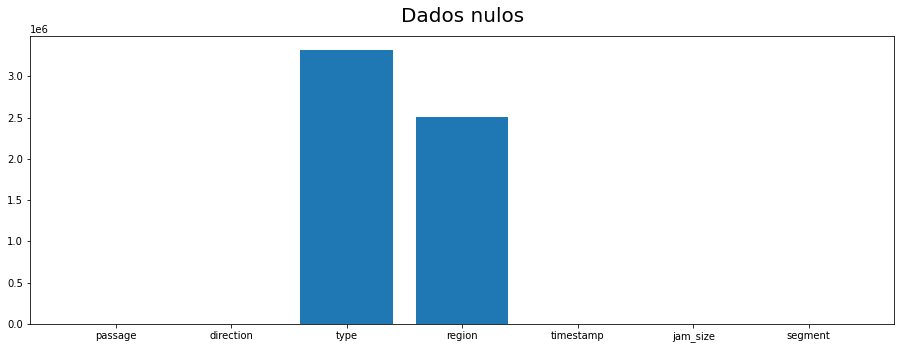

In [62]:
#Gráfico representando a quantidade de dados nulos
%matplotlib inline

fig = pt.figure()
fig.suptitle("Dados nulos",x=1,y=1.1,size=20)
ax = fig.add_axes([0,0,2,1])
elementos = ['passage','direction','type','region','timestamp','jam_size','segment']
a = dados['passage'].isnull().sum()                 
b = dados['direction'].isnull().sum()
c = dados['type'].isnull().sum()
d = dados['region'].isnull().sum()
e = dados['timestamp'].isnull().sum()
f = dados['jam_size'].isnull().sum()
g = dados['segment'].isnull().sum()

qtd = [a,b,c,d,e,f,g]
ax.bar(elementos,qtd)

In [63]:
#verificando a quantidade de linhas onde tanto 'region' como 'type' são NaN
dados.loc[dados['type'].isnull() & dados['region'].isnull()].shape

(1200247, 8)

In [592]:
#como a quantidade de dados vazios é muito grande, deletando as linhas com Nan eu perco muitas informações importantes, assim, a melhor solução
#é procurar uma maneira de preencher esses dados vazios.
dados.isnull().sum()

index              0
passage            0
direction          0
type         3323735
region       2509341
timestamp          0
jam_size           0
segment            0
dtype: int64

In [594]:
#vendo os comprimentos de transito que mais se repetem em E
x = dados.loc[dados['type'] == "E"]
x['passage'].value_counts().head(10)

Marginal Tietê                              226442
Marginal Pinheiros                          225780
Radial Leste - DEC MO                       108347
Salim Farah Maluf, Av/Tatuapé, Pte           65052
Vinte Três/R Berta/M Guimarães               54900
Rebouças/ Eusébio Matoso,  Av                50660
Estado, Av do - DEC VILA PRUDENTE            43817
Ligação - Dec HG (F)                         28362
Faria Lima,  Av Brig                         26261
Vale/P.Maia/Tirad/S.Dumont                   22581
Name: passage, dtype: int64

In [595]:
#vendo as passagens que mais se repetem em A e podemos observar que as únicas relevantes são Marginal Tietê e Marginal Pinheiros 
A = dados.loc[dados['type'] == "A"]
A['passage'].value_counts().head(10)

Marginal Tietê                              258824
Marginal Pinheiros                          158744
Salim Farah Maluf, Av/Tatuapé, Pte           23078
Mercúrio, Av                                 17138
Estado, Av do - DEC VILA PRUDENTE            12426
Maria Paula/Vd Jacareí/Vd 9 de Julho         11671
Queiroz, Av. Sen.                             9177
Radial Leste - DEC MO                         7768
Sapetuba, R                                   5988
Luis, Av. São                                 1278
Name: passage, dtype: int64

In [64]:
dados["type"].fillna("E", inplace = True)

In [65]:
dados['region'].value_counts()

CENTRO    811594
OESTE     732056
SUL       621874
LESTE     410407
NORTE     138176
Name: region, dtype: int64

In [66]:
dados['region'].fillna("CENTRO", inplace = True);

Para tratar os dados nulos de região, repeti o valor com mais repetições

In [67]:
dados.isnull().sum()

index        0
passage      0
direction    0
type         0
region       0
timestamp    0
jam_size     0
segment      0
dtype: int64

In [68]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223448 entries, 0 to 5223447
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   index      int64         
 1   passage    category      
 2   direction  category      
 3   type       category      
 4   region     category      
 5   timestamp  datetime64[ns]
 6   jam_size   int64         
 7   segment    category      
dtypes: category(5), datetime64[ns](1), int64(2)
memory usage: 169.3 MB


In [4]:
#conversão dos valores categóricos pra numéricos

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
newDF = dados.filter(items=['passage','direction','type','region','timestamp','jam_size','segment'])
valores_numericos = label_encoder.fit_transform(dados['passage'])
newDF["passage"]=valores_numericos
valores_numericos = label_encoder.fit_transform(dados['direction'])
newDF["direction"]=valores_numericos
valores_numericos = label_encoder.fit_transform(dados['type'])
newDF["type"]=valores_numericos
valores_numericos = label_encoder.fit_transform(dados['region'])
newDF["region"]=valores_numericos
valores_numericos = label_encoder.fit_transform(dados['segment'])
newDF["segment"]=valores_numericos

newDF

,passage,direction,type,region,timestamp,jam_size,segment
0,153,101,2,3,2015-01-04 14:30:00,799,99695
1,151,29,2,4,2015-01-04 14:30:00,260,533
2,153,101,2,3,2015-01-04 15:00:00,799,99695
3,151,29,2,4,2015-01-04 15:00:00,260,533
4,153,101,2,3,2015-01-04 15:30:00,799,99695
...,...,...,...,...,...,...,...
5223443,170,33,0,3,2018-09-30 18:30:00,3820,75974
5223444,170,33,1,3,2018-09-30 19:00:00,4640,76072
5223445,170,33,0,3,2018-09-30 19:00:00,3820,75974
5223446,170,33,1,3,2018-09-30 19:30:00,4640,76072


Afim de transformar os dados catégoricos em numéricos usei o utilitário LabelEncoder da biblioteca scikit-learn para fazer isso, essa conversão é importante pois alguns algoritmos de Machine Learning não aceitam dados categóricos como entrada.

In [70]:

%matplotlib inline
rcParams['figure.figsize'] = 6, 3
sns.set_style('whitegrid')


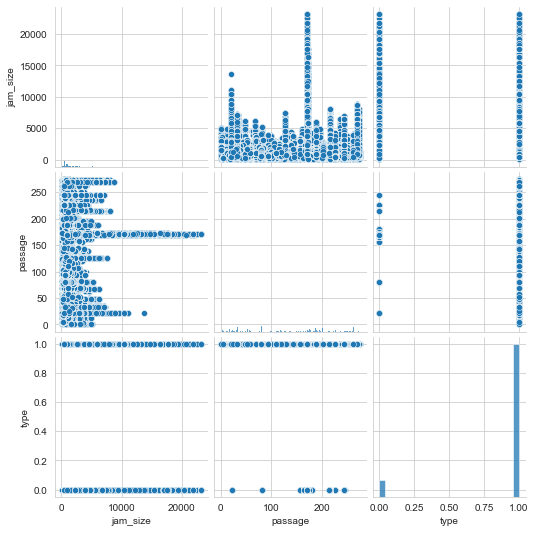

In [71]:
#montagem do histograma
w=newDF[['jam_size','passage','type']]
sns.pairplot(w);

In [72]:
#calculo do coeficiente de correlação de Pearson
C = w.corr()
C

,jam_size,passage,type
jam_size,1.000000,0.118233,-0.120056
passage,0.118233,1.000000,-0.084673
type,-0.120056,-0.084673,1.000000


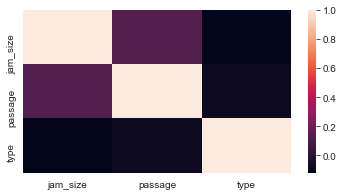

In [73]:
#visualização do gráfico
sns.heatmap(C, xticklabels=C.columns.values , yticklabels=C.columns.values);

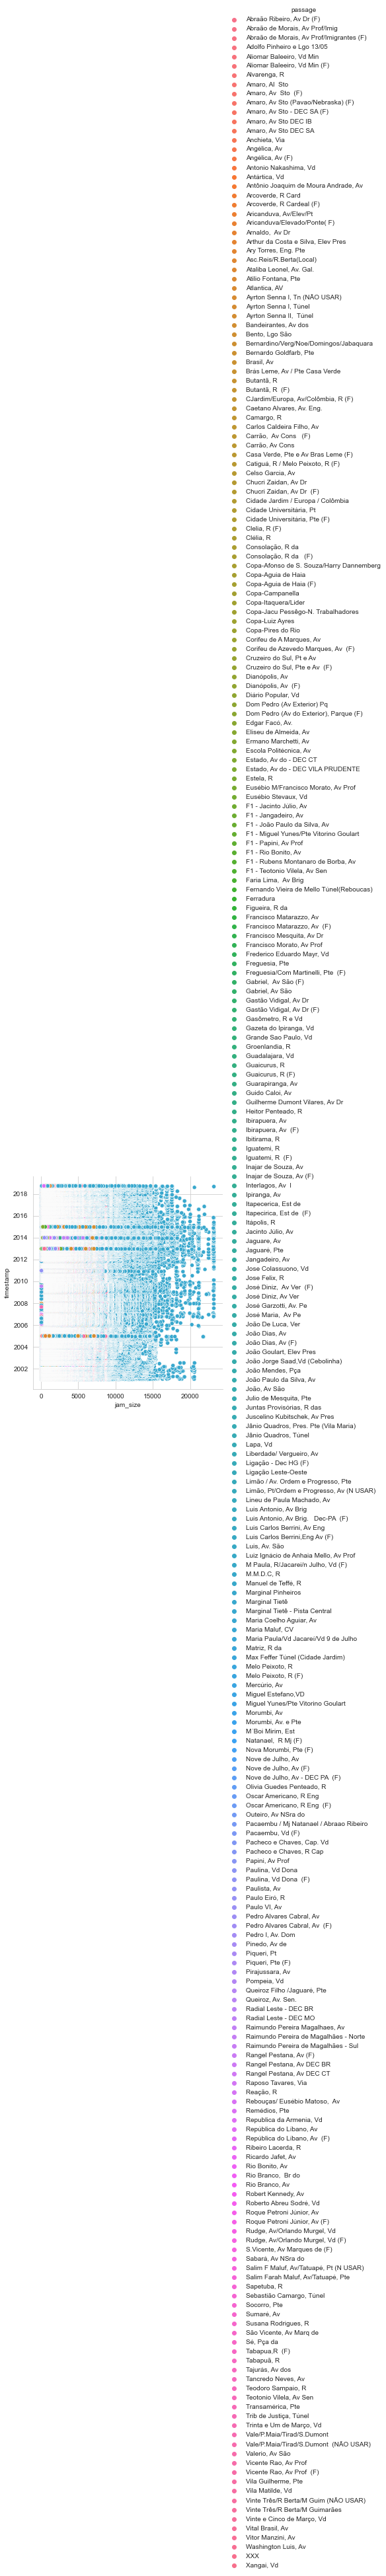

In [74]:
#gráfico da distribuição dos engarrafamentos sendo agregado por ano
y = dados.filter(items=['passage','jam_size','timestamp'])
y.sort_values('timestamp')

sns.relplot(x='jam_size', y='timestamp', hue='passage', data=y);

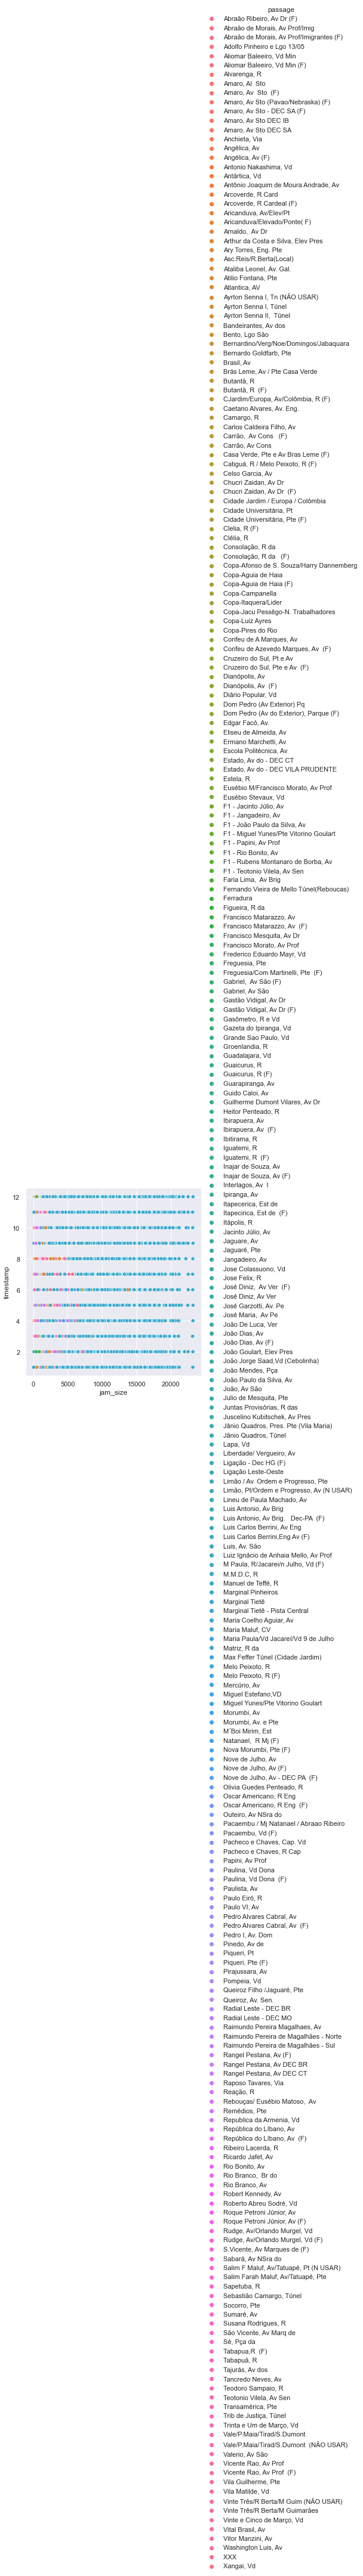

In [125]:
#gráfico da distribuição dos engarrafamentos sendo agregado por mês
y = dados.filter(items=['passage','jam_size','timestamp'])
y['timestamp'] = y['timestamp'].dt.month
y.sort_values('timestamp')

sns.relplot(x='jam_size', y='timestamp', hue='passage', data=y);

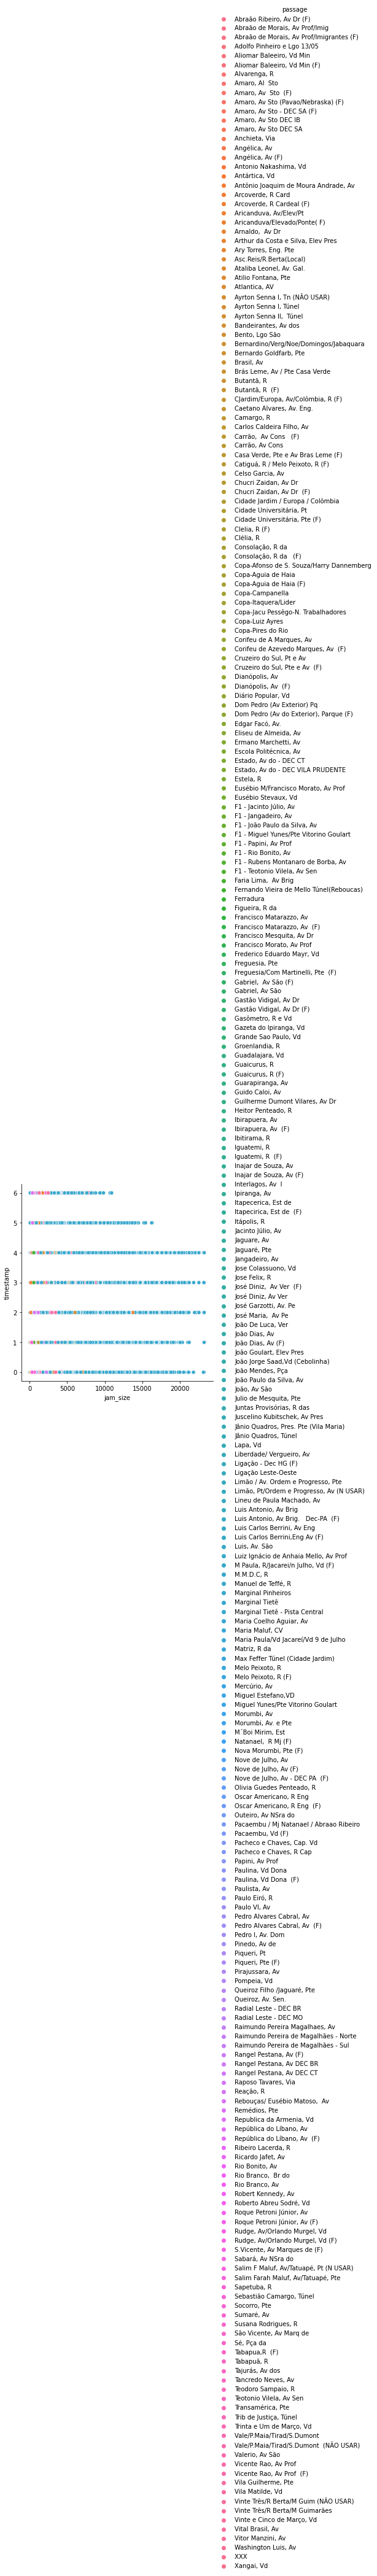

In [5]:
#gráfico da distribuição dos engarrafamentos sendo agregado por dia da semana
y = dados.filter(items=['passage','jam_size','timestamp'])
y['timestamp'] = y['timestamp'].dt.weekday
y.sort_values('timestamp')

sns.relplot(x='jam_size', y='timestamp', hue='passage', data=y);

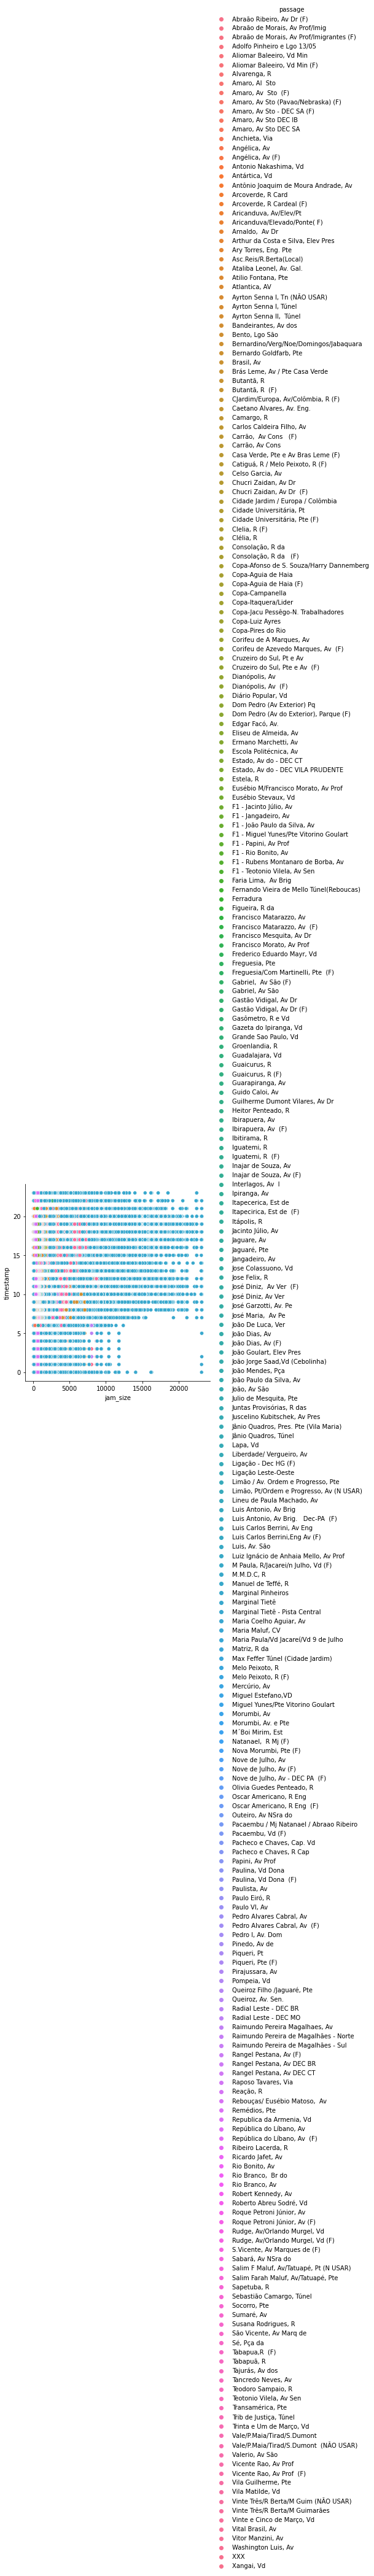

In [37]:
#gráfico da distribuição dos engarrafamentos sendo agregado por hora
y = dados.filter(items=['passage','jam_size','timestamp'])
y['timestamp'] = y['timestamp'].dt.hour
y.sort_values('timestamp')

sns.relplot(x='jam_size', y='timestamp', hue='passage', data=y);

No gráfico da distribuição dos engarrafamentos por ano, é notório que entre os anos de 2007 e 2016 houveram grandes engarrafamentos recorrentes. 
Observando o gráfico dos meses, nota-se que os engarrafamento são menores nos meses iniciais. 
É possível observar que nos fináis de semana e durante a madrugada (entre 0h-5h) o comprimento dos engarrafamentos é muito menor. 

In [30]:
newDF['jam_size'].mean()

1453.5294749751506

In [31]:
#Essas duas linhas de códigos servem para tratar o problema como um problema de classificação, onde em vez de tentar prever
#um resultado numérico específico (regressão) o algoritimo apenas irá prever a classe. Dessa maneira, eu transformei a coluna 
# 'jam_size' em boolean. 
# 0 = engarrafamento menor que a média e
# 1 = engarrafamento maior que a média

newDF.loc[newDF['jam_size'] <= 1453, 'jam_size'] = 0
newDF.loc[newDF['jam_size'] > 1453, 'jam_size'] = 1

#separação das variáveis
y = newDF[['passage','timestamp']]

y = y.assign(Hora = newDF['timestamp'].dt.hour)
y = y.drop('timestamp', axis = 1)

x = newDF.drop('passage', axis = 1)
x = x.drop('timestamp', axis = 1)

#conjunto de dados de treino e teste, o conjunto de treino vai conter 70% dos dados
x_main , x_test, y_main, y_test = train_test_split(x,y, test_size = 0.3)



In [34]:
#criação do modelo
modelo = ExtraTreesClassifier()
modelo.fit(x_main,y_main)

#resultados
result = modelo.score(x_test,y_test)
print("Acertividade",result)

MemoryError: could not allocate 576716800 bytes

Para criar o classificador eu criei duas variáveis, uma recebendo todo o DataFrame e dropando apenas as colunas que quero prever e a outra variável recebendo apenas as colunas alvo.
O próximo passo foi usar a função split para separar oq vai ser usado como aprendizado do algoritimo (70% da lista) e o resto será usado para teste
Com a variável 'modelo' eu instacio a função ExtraTreesClassifier (Função do algoritimo de Machine Learn), em seguida chamo a função.
A função implementa um estimador que cria um número aleatório de árvores de decisão em várias amostras do DataFrame e utiliza cálculos de média para melhorar a precisão das predições. Como o 

In [30]:
#Nesta variável está contido o dataframe, excludente as colunas de predição
x.columns

Index(['direction', 'type', 'region', 'jam_size', 'segment'], dtype='object')

In [20]:
#Esta variavel recebe as colunas que desejo prever 
#(de acordo com a passagem e o horário, desejo saber o comprimento do engarrafamento)
y.head()

,passage,Hora
0,153,14
1,151,14
2,153,15
3,151,15
4,153,15


In [18]:
#Nesta variável está contido 70% das linhas do dataframe, excludente as colunas de predição (Usado para treinamento do Algoritimo)
x_main.shape

(3656413, 5)

In [26]:
#Nesta variável está contido 70% das colunas que desejo prever (Usado para treinamento do Algoritimo)
y_main.shape

(3656413, 2)

In [27]:
#Nesta variável está contido 30% das linhas do dataframe, excludente as colunas de predição 
#Esses 30% serão usados para prever o engarrafamento para determinado local e hora
x_test .shape

(1567035, 5)

In [28]:
#nesta variável está contido 30% das colunas que desejo prever 
#(Esses 30% serão usados para comparar com os valores estimados pelo algoritimo)
y_test.shape

(1567035, 2)